In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# import seaborn as sns
# sns.set(style="whitegrid", color_codes=True)

import seaborn as sns

# For plot sizes
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

In [2]:
df = pd.read_hdf("cleaned_store.h5", key="table_name", where='Journey_Pattern_ID == "00401001"', columns=['Timestamp', "Journey_Pattern_ID", "Time_Frame", "Vehicle_Journey_ID", "Week_Day", "Distance", "TravelTime", "TimeCategory", "Rain"])
df.columns = ["Timestamp", "JourneyPatternId", "TimeFrame", "VehicleJourneyId", "Day", "Distance", "TravelTime", "TimeCategory", "Rain"]

In [3]:
df.head()

,Timestamp,JourneyPatternId,TimeFrame,VehicleJourneyId,Day,Distance,TravelTime,TimeCategory,Rain
823,2012-11-12 13:01:23,00401001,2012-11-12,6462,0,10.693702,1953.0,12:30:00,0.0
824,2012-11-12 13:02:41,00401001,2012-11-12,6462,0,11.236275,2031.0,12:30:00,0.0
825,2012-11-12 13:03:01,00401001,2012-11-12,6462,0,11.359826,2051.0,12:30:00,0.0
826,2012-11-12 13:05:23,00401001,2012-11-12,6462,0,11.750859,2193.0,12:30:00,0.0
827,2012-11-12 13:06:02,00401001,2012-11-12,6462,0,12.158680,2232.0,12:30:00,0.0


## Change Day Category

In [4]:
# Organise the Data
df = df.sort_values(['TimeFrame', 'VehicleJourneyId', 'Timestamp'], ascending=True)

# Clean up index
df = df.reset_index()
del df['index']

In [5]:
df.Day = df.Day.astype("str")

In [6]:
# Create group object to work with 
gb = df.groupby(["TimeFrame"], as_index=False, group_keys=False)

In [7]:
def change_day(group):
    
    day_num = group.Day.value_counts().index.tolist()[0]
    
    if day_num == '0' or day_num == '1' or day_num == '2' or day_num == '3' or day_num == '4':
        group.Day = 'Mon-Fri'
        
    if day_num == '5':
        group.Day = 'Sat'
        
    if day_num == '6':
        group.Day = 'Sun'
    
    return group

In [8]:
df = gb.apply(change_day)

In [9]:
df.Day = df.Day.astype("category")

In [10]:
df.dtypes

Timestamp           datetime64[ns]
JourneyPatternId            object
TimeFrame           datetime64[ns]
VehicleJourneyId            object
Day                       category
Distance                   float64
TravelTime                 float64
TimeCategory                object
Rain                       float32
dtype: object

## Change TimeCategory To New Speed Category

In [11]:
df.head()

,Timestamp,JourneyPatternId,TimeFrame,VehicleJourneyId,Day,Distance,TravelTime,TimeCategory,Rain
0,2012-11-06 12:40:39,00401001,2012-11-06,6320,Mon-Fri,0.000000,0.0,12:30:00,0.0
1,2012-11-06 12:42:58,00401001,2012-11-06,6320,Mon-Fri,1.288087,139.0,12:30:00,0.0
2,2012-11-06 12:43:41,00401001,2012-11-06,6320,Mon-Fri,1.539224,182.0,12:30:00,0.0
3,2012-11-06 12:43:59,00401001,2012-11-06,6320,Mon-Fri,1.860739,200.0,12:30:00,0.0
4,2012-11-06 12:44:20,00401001,2012-11-06,6320,Mon-Fri,2.188079,221.0,12:30:00,0.0


In [12]:
df.columns = ["Timestamp", "JourneyPatternId", "TimeFrame", "VehicleJourneyId", "Day", "Distance", "TravelTime", "Speed", "Rain"]

In [13]:
# Organise the Data
df = df.sort_values(['TimeFrame', 'VehicleJourneyId', 'Timestamp'], ascending=True)

# Clean up index
df = df.reset_index()
del df['index']

In [14]:
# Create group object to work with 
gb = df.groupby(["TimeFrame", "VehicleJourneyId"], as_index=False, group_keys=False)

In [15]:
def change_day(group):
    
    day = group.Day.value_counts().index.tolist()[0]
    time_cat = group.Speed.value_counts().index.tolist()[0]
    
    # For Weekdays
    if day == 'Mon-Fri':
        if time_cat == "06:00:00":
            group.Speed = 'Fast'
        if time_cat == "06:30:00":
            group.Speed = 'Fast'
        if time_cat == "07:00:00":
            group.Speed = 'Medium'
        if time_cat == "07:30:00":
            group.Speed = 'Medium'
        if time_cat == "08:00:00":
            group.Speed = 'Slow'
        if time_cat == "08:30:00":
            group.Speed = 'Slow'
        if time_cat == "09:00:00":
            group.Speed = 'Slow'
        if time_cat == "09:30:00":
            group.Speed = 'Medium'
        if time_cat == "10:00:00":
            group.Speed = 'Medium'
        if time_cat == "10:30:00":
            group.Speed = 'Medium'
        if time_cat == "11:00:00":
            group.Speed = 'Medium'
        if time_cat == "11:30:00":
            group.Speed = 'Medium'
        if time_cat == "12:00:00":
            group.Speed = 'Medium'
        if time_cat == "12:30:00":
            group.Speed = 'Medium'
        if time_cat == "13:00:00":
            group.Speed = 'Slow'
        if time_cat == "13:30:00":
            group.Speed = 'Slow'
        if time_cat == "14:00:00":
            group.Speed = 'Medium'
        if time_cat == "14:30:00":
            group.Speed = 'Medium'
        if time_cat == "15:00:00":
            group.Speed = 'Medium'
        if time_cat == "15:30:00":
            group.Speed = 'Medium'
        if time_cat == "16:00:00":
            group.Speed = 'Slow'
        if time_cat == "16:30:00":
            group.Speed = 'Slow'
        if time_cat == "17:00:00":
            group.Speed = 'Slow'
        if time_cat == "17:30:00":
            group.Speed = 'Slow'
        if time_cat == "18:00:00":
            group.Speed = 'Slow'
        if time_cat == "18:30:00":
            group.Speed = 'Medium'
        if time_cat == "19:00:00":
            group.Speed = 'Medium'
        if time_cat == "19:30:00":
            group.Speed = 'Medium'
        if time_cat == "20:00:00":
            group.Speed = 'Medium'
        if time_cat == "20:30:00":
            group.Speed = 'Medium'
        if time_cat == "21:00:00":
            group.Speed = 'Medium'
        if time_cat == "21:30:00":
            group.Speed = 'Fast'
        if time_cat == "22:00:00":
            group.Speed = 'Fast'
        if time_cat == "22:30:00":
            group.Speed = 'Fast'
        if time_cat == "23:00:00":
            group.Speed = 'Fast'
        if time_cat == "23:30:00":
            group.Speed = 'Fast'
        if time_cat == "00:00:00":
            group.Speed = 'Fast'
        if time_cat == "00:30:00":
            group.Speed = 'Fast'
        if time_cat == "01:00:00":
            group.Speed = 'Fast'
        if time_cat == "01:30:00":
            group.Speed = 'Fast'
        if time_cat == "02:00:00":
            group.Speed = 'Fast'
        if time_cat == "02:30:00":
            group.Speed = 'Fast'
            
    # For Saturday
    if day == 'Sat':
        if time_cat == "06:00:00":
            group.Speed = 'Fast'
        if time_cat == "06:30:00":
            group.Speed = 'Fast'
        if time_cat == "07:00:00":
            group.Speed = 'Fast'
        if time_cat == "07:30:00":
            group.Speed = 'Fast'
        if time_cat == "08:00:00":
            group.Speed = 'Medium'
        if time_cat == "08:30:00":
            group.Speed = 'Medium'
        if time_cat == "09:00:00":
            group.Speed = 'Slow'
        if time_cat == "09:30:00":
            group.Speed = 'Medium'
        if time_cat == "10:00:00":
            group.Speed = 'Medium'
        if time_cat == "10:30:00":
            group.Speed = 'Medium'
        if time_cat == "11:00:00":
            group.Speed = 'Medium'
        if time_cat == "11:30:00":
            group.Speed = 'Medium'
        if time_cat == "12:00:00":
            group.Speed = 'Medium'
        if time_cat == "12:30:00":
            group.Speed = 'Medium'
        if time_cat == "13:00:00":
            group.Speed = 'Slow'
        if time_cat == "13:30:00":
            group.Speed = 'Medium'
        if time_cat == "14:00:00":
            group.Speed = 'Medium'
        if time_cat == "14:30:00":
            group.Speed = 'Medium'
        if time_cat == "15:00:00":
            group.Speed = 'Medium'
        if time_cat == "15:30:00":
            group.Speed = 'Medium'
        if time_cat == "16:00:00":
            group.Speed = 'Slow'
        if time_cat == "16:30:00":
            group.Speed = 'Medium'
        if time_cat == "17:00:00":
            group.Speed = 'Medium'
        if time_cat == "17:30:00":
            group.Speed = 'Medium'
        if time_cat == "18:00:00":
            group.Speed = 'Medium'
        if time_cat == "18:30:00":
            group.Speed = 'Medium'
        if time_cat == "19:00:00":
            group.Speed = 'Medium'
        if time_cat == "19:30:00":
            group.Speed = 'Medium'
        if time_cat == "20:00:00":
            group.Speed = 'Medium'
        if time_cat == "20:30:00":
            group.Speed = 'Medium'
        if time_cat == "21:00:00":
            group.Speed = 'Fast'
        if time_cat == "21:30:00":
            group.Speed = 'Fast'
        if time_cat == "22:00:00":
            group.Speed = 'Fast'
        if time_cat == "22:30:00":
            group.Speed = 'Fast'
        if time_cat == "23:00:00":
            group.Speed = 'Fast'
        if time_cat == "23:30:00":
            group.Speed = 'Fast'
        if time_cat == "00:00:00":
            group.Speed = 'Fast'
        if time_cat == "00:30:00":
            group.Speed = 'Fast'
        if time_cat == "01:00:00":
            group.Speed = 'Fast'
        if time_cat == "01:30:00":
            group.Speed = 'Fast'
        if time_cat == "02:00:00":
            group.Speed = 'Fast'
        if time_cat == "02:30:00":
            group.Speed = 'Fast'
            
    # For Sunday
    if day == 'Sun':
        if time_cat == "06:00:00":
            group.Speed = 'Fast'
        if time_cat == "06:30:00":
            group.Speed = 'Fast'
        if time_cat == "07:00:00":
            group.Speed = 'Fast'
        if time_cat == "07:30:00":
            group.Speed = 'Fast'
        if time_cat == "08:00:00":
            group.Speed = 'Fast'
        if time_cat == "08:30:00":
            group.Speed = 'Fast'
        if time_cat == "09:00:00":
            group.Speed = 'Medium'
        if time_cat == "09:30:00":
            group.Speed = 'Fast'
        if time_cat == "10:00:00":
            group.Speed = 'Fast'
        if time_cat == "10:30:00":
            group.Speed = 'Fast'
        if time_cat == "11:00:00":
            group.Speed = 'Medium'
        if time_cat == "11:30:00":
            group.Speed = 'Medium'
        if time_cat == "12:00:00":
            group.Speed = 'Medium'
        if time_cat == "12:30:00":
            group.Speed = 'Medium'
        if time_cat == "13:00:00":
            group.Speed = 'Slow'
        if time_cat == "13:30:00":
            group.Speed = 'Medium'
        if time_cat == "14:00:00":
            group.Speed = 'Medium'
        if time_cat == "14:30:00":
            group.Speed = 'Medium'
        if time_cat == "15:00:00":
            group.Speed = 'Medium'
        if time_cat == "15:30:00":
            group.Speed = 'Medium'
        if time_cat == "16:00:00":
            group.Speed = 'Medium'
        if time_cat == "16:30:00":
            group.Speed = 'Medium'
        if time_cat == "17:00:00":
            group.Speed = 'Medium'
        if time_cat == "17:30:00":
            group.Speed = 'Medium'
        if time_cat == "18:00:00":
            group.Speed = 'Medium'
        if time_cat == "18:30:00":
            group.Speed = 'Medium'
        if time_cat == "19:00:00":
            group.Speed = 'Medium'
        if time_cat == "19:30:00":
            group.Speed = 'Medium'
        if time_cat == "20:00:00":
            group.Speed = 'Medium'
        if time_cat == "20:30:00":
            group.Speed = 'Medium'
        if time_cat == "21:00:00":
            group.Speed = 'Fast'
        if time_cat == "21:30:00":
            group.Speed = 'Fast'
        if time_cat == "22:00:00":
            group.Speed = 'Fast'
        if time_cat == "22:30:00":
            group.Speed = 'Fast'
        if time_cat == "23:00:00":
            group.Speed = 'Fast'
        if time_cat == "23:30:00":
            group.Speed = 'Fast'
        if time_cat == "00:00:00":
            group.Speed = 'Fast'
        if time_cat == "00:30:00":
            group.Speed = 'Fast'
        if time_cat == "01:00:00":
            group.Speed = 'Fast'
        if time_cat == "01:30:00":
            group.Speed = 'Fast'
        if time_cat == "02:00:00":
            group.Speed = 'Fast'
        if time_cat == "02:30:00":
            group.Speed = 'Fast'
    
    
    return group

In [16]:
df = gb.apply(change_day)

In [27]:
df.head()

,Timestamp,JourneyPatternId,TimeFrame,VehicleJourneyId,Day,Distance,TravelTime,Speed,Rain
0,2012-11-06 12:40:39,00401001,2012-11-06,6320,Mon-Fri,0.000000,0.0,Medium,0.0
1,2012-11-06 12:42:58,00401001,2012-11-06,6320,Mon-Fri,1.288087,139.0,Medium,0.0
2,2012-11-06 12:43:41,00401001,2012-11-06,6320,Mon-Fri,1.539224,182.0,Medium,0.0
3,2012-11-06 12:43:59,00401001,2012-11-06,6320,Mon-Fri,1.860739,200.0,Medium,0.0
4,2012-11-06 12:44:20,00401001,2012-11-06,6320,Mon-Fri,2.188079,221.0,Medium,0.0


# Check Rain's Effect

In [22]:
# Filter to one Journey Pattern ID
test = df

In [21]:
sun = test[test.TimeFrame == '2012-11-11']
mon = test[test.TimeFrame == '2012-11-12']
tue = test[test.TimeFrame == '2012-11-06']
wed = test[test.TimeFrame == '2012-11-07']
thu = test[test.TimeFrame == '2012-11-08']
fri = test[test.TimeFrame == '2012-11-09']
sat = test[test.TimeFrame == '2012-11-10']

In [25]:
df.TimeFrame = df.TimeFrame.astype("str")

In [26]:
df.dtypes

Timestamp           datetime64[ns]
JourneyPatternId            object
TimeFrame                   object
VehicleJourneyId            object
Day                       category
Distance                   float64
TravelTime                 float64
Speed                       object
Rain                       float32
dtype: object

In [78]:
thu.Rain.mean()

0.0

In [79]:
fri.Rain.mean()

0.2842070460319519

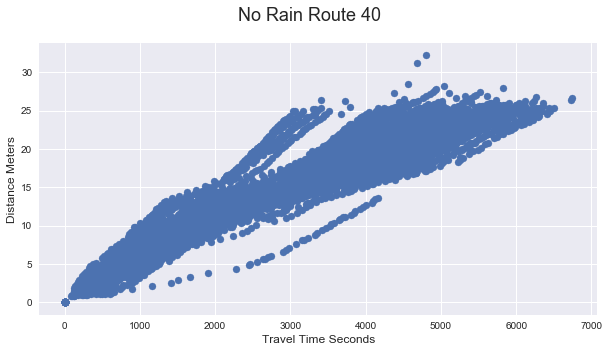

In [86]:
plt.scatter("TravelTime", "Distance", data=thu)
plt.suptitle('No Rain Route 40', fontsize=18)
plt.xlabel('Travel Time Seconds', fontsize=12)
plt.ylabel('Distance Meters', fontsize=12)

plt.savefig("No Rain Route 40")

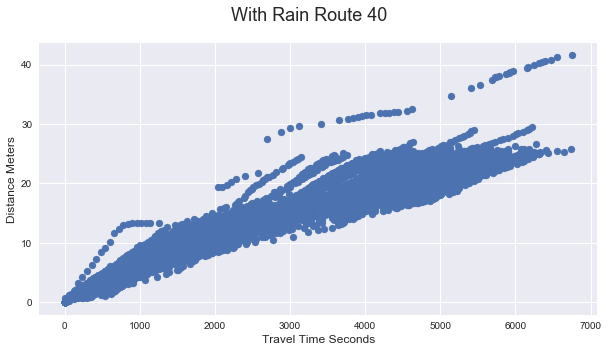

In [87]:
plt.scatter("TravelTime", "Distance", data=fri)
plt.suptitle('With Rain Route 40', fontsize=18)
plt.xlabel('Travel Time Seconds', fontsize=12)
plt.ylabel('Distance Meters', fontsize=12)

plt.savefig("With Rain Route 40")

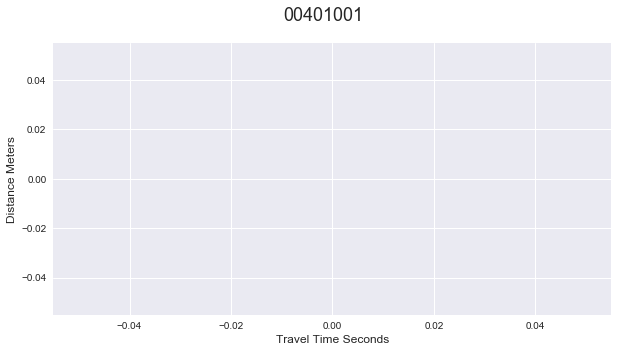

In [433]:
plt.scatter("TravelTime", "Distance", data=tue)
plt.suptitle('00401001', fontsize=18)
plt.xlabel('Travel Time Seconds', fontsize=12)
plt.ylabel('Distance Meters', fontsize=12)

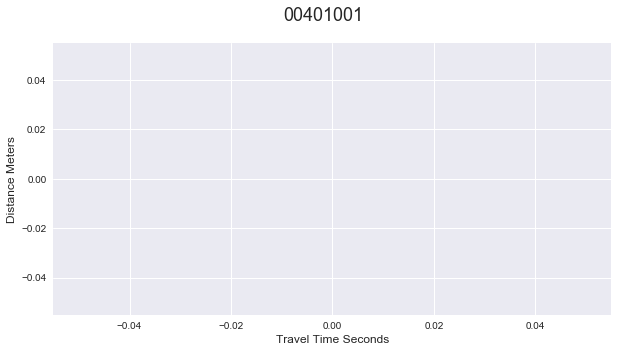

In [434]:
plt.scatter("TravelTime", "Distance", data=wed)
plt.suptitle('00401001', fontsize=18)
plt.xlabel('Travel Time Seconds', fontsize=12)
plt.ylabel('Distance Meters', fontsize=12)

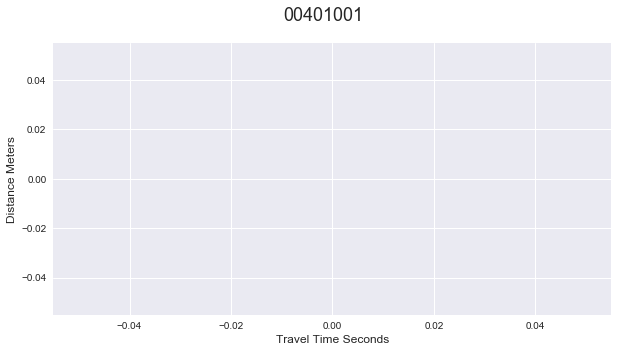

In [435]:
plt.scatter("TravelTime", "Distance", data=thu)
plt.suptitle('00401001', fontsize=18)
plt.xlabel('Travel Time Seconds', fontsize=12)
plt.ylabel('Distance Meters', fontsize=12)

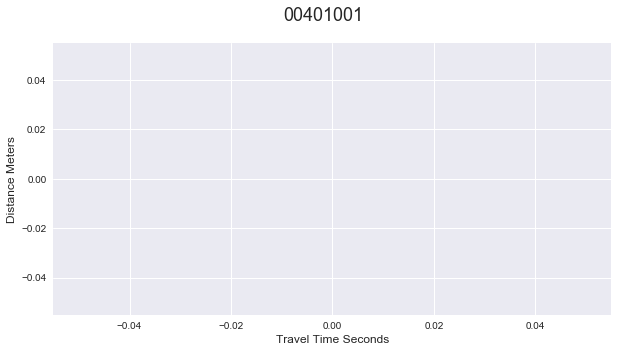

In [436]:
plt.scatter("TravelTime", "Distance", data=fri)
plt.suptitle('00401001', fontsize=18)
plt.xlabel('Travel Time Seconds', fontsize=12)
plt.ylabel('Distance Meters', fontsize=12)

# Make Linear Regression Model

In [89]:
# df.JourneyPatternId = df.JourneyPatternId.astype("object")
# df.Day = df.Day.astype("object")
# df.Speed = df.Speed.astype("object")

df.Speed = df.Speed.astype("category")
df.TimeFrame = df.TimeFrame.astype("str")

In [91]:
df.dtypes

Timestamp           datetime64[ns]
JourneyPatternId            object
TimeFrame                   object
VehicleJourneyId            object
Day                       category
Distance                   float64
TravelTime                 float64
Speed                     category
Rain                       float32
dtype: object

In [92]:
df.head()

,Timestamp,JourneyPatternId,TimeFrame,VehicleJourneyId,Day,Distance,TravelTime,Speed,Rain
0,2012-11-06 12:40:39,00401001,2012-11-06,6320,Mon-Fri,0.000000,0.0,Medium,0.0
1,2012-11-06 12:42:58,00401001,2012-11-06,6320,Mon-Fri,1.288087,139.0,Medium,0.0
2,2012-11-06 12:43:41,00401001,2012-11-06,6320,Mon-Fri,1.539224,182.0,Medium,0.0
3,2012-11-06 12:43:59,00401001,2012-11-06,6320,Mon-Fri,1.860739,200.0,Medium,0.0
4,2012-11-06 12:44:20,00401001,2012-11-06,6320,Mon-Fri,2.188079,221.0,Medium,0.0


In [93]:
df.Speed.value_counts()

Medium    150579
Slow       70594
Fast       35421
Name: Speed, dtype: int64

In [94]:
train = df[df['TimeFrame'] < '2012-11-16']
test = df[df['TimeFrame'] >= '2012-11-16']

In [361]:
# train = train[train.Day == 0]
# test = test[test.Day == 0]

In [362]:
# train = train[train.JourneyPatternId == '00401001']
# test = test[test.JourneyPatternId == '00401001']

In [95]:
train.Speed.value_counts()

Medium    32740
Slow      14753
Fast       7613
Name: Speed, dtype: int64

In [96]:
# create a fitted test model
lm = smf.ols(formula='TravelTime ~ Speed + Distance + Day', data=train).fit()

In [97]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.589e+05
Date:                Thu, 20 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:28:11   Log-Likelihood:            -4.1129e+05
No. Observations:               55106   AIC:                         8.226e+05
Df Residuals:                   55100   BIC:                         8.226e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        -857.1531      5.996   -1

In [98]:
test_y = test["TravelTime"]
test_X = test[["Distance", "Speed", "Day"]]

In [99]:
# test_X = test_X[test_X.TimeCategory != '00:00']
predictions = lm.predict(test_X)

In [100]:
pd.DataFrame({"Real": test_y, "Predicted":predictions})

,Predicted,Real
55106,-281.483624,0.0
55107,117.077666,119.0
55108,157.624280,159.0
55109,205.658749,200.0
55110,248.620194,239.0
55111,341.120394,298.0
55112,361.473347,319.0
55113,483.082467,378.0
55114,515.684996,419.0
55115,550.089785,479.0


In [101]:
# Custom Metric
abs(abs(test_y) - abs(predictions)).mean()  

341.781357878684

In [102]:
# Print the Mean Squared Error of the model on the training set
mse = ((test_y - predictions)** 2).mean()
print("\nMean Squared Error:\n", mse)


Mean Squared Error:
 243588.1487831879


In [103]:
from math import sqrt

sqrt(mse)

493.546501135595

# Sklearn Linear Regression

In [104]:
lin_df = df

In [106]:
# Get dummies
day_dummies = pd.get_dummies(lin_df.Day)
# day_dummies.columns = ["Mon-Fri", "Sat", "Sun"]

speed_dummies = pd.get_dummies(lin_df.Speed)

In [107]:
""" NB Do not run """
# journey_pattern_id_dummies = pd.get_dummies(lin_df.JourneyPatternId)

' NB Do not run '

In [108]:
# Assign to df
lin_df = pd.concat([lin_df, day_dummies], axis=1)
lin_df = pd.concat([lin_df, speed_dummies], axis=1)

In [109]:
lin_df.head()

,Timestamp,JourneyPatternId,TimeFrame,VehicleJourneyId,Day,Distance,TravelTime,Speed,Rain,Mon-Fri,Sat,Sun,Fast,Medium,Slow
0,2012-11-06 12:40:39,00401001,2012-11-06,6320,Mon-Fri,0.000000,0.0,Medium,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2012-11-06 12:42:58,00401001,2012-11-06,6320,Mon-Fri,1.288087,139.0,Medium,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2012-11-06 12:43:41,00401001,2012-11-06,6320,Mon-Fri,1.539224,182.0,Medium,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2012-11-06 12:43:59,00401001,2012-11-06,6320,Mon-Fri,1.860739,200.0,Medium,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2012-11-06 12:44:20,00401001,2012-11-06,6320,Mon-Fri,2.188079,221.0,Medium,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [113]:
lin_df.Sat = lin_df.Sat.astype("int")
lin_df.Sun = lin_df.Sun.astype("int")
lin_df["Mon-Fri"] = lin_df["Mon-Fri"].astype("int")
lin_df.Fast = lin_df.Fast.astype("int")
lin_df.Medium = lin_df.Medium.astype("int")
lin_df.Slow = lin_df.Slow.astype("int")

lin_df.TravelTime = lin_df.TravelTime.astype("float")
lin_df.Distance = lin_df.Distance.astype("float")

In [114]:
lin_df.dtypes

Timestamp           datetime64[ns]
JourneyPatternId            object
TimeFrame                   object
VehicleJourneyId            object
Day                       category
Distance                   float64
TravelTime                 float64
Speed                     category
Rain                       float32
Mon-Fri                      int32
Sat                          int32
Sun                          int32
Fast                         int32
Medium                       int32
Slow                         int32
dtype: object

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [116]:
# Split the data into training/testing sets
X_train = lin_df[lin_df['TimeFrame'] < '2012-11-16']
X_test = lin_df[lin_df['TimeFrame'] >= '2012-11-16']

In [117]:
# Split the targets into training/testing sets
y_train = X_train.TravelTime
y_test = X_test.TravelTime

In [118]:
X_train.head()

,Timestamp,JourneyPatternId,TimeFrame,VehicleJourneyId,Day,Distance,TravelTime,Speed,Rain,Mon-Fri,Sat,Sun,Fast,Medium,Slow
0,2012-11-06 12:40:39,00401001,2012-11-06,6320,Mon-Fri,0.000000,0.0,Medium,0.0,1,0,0,0,1,0
1,2012-11-06 12:42:58,00401001,2012-11-06,6320,Mon-Fri,1.288087,139.0,Medium,0.0,1,0,0,0,1,0
2,2012-11-06 12:43:41,00401001,2012-11-06,6320,Mon-Fri,1.539224,182.0,Medium,0.0,1,0,0,0,1,0
3,2012-11-06 12:43:59,00401001,2012-11-06,6320,Mon-Fri,1.860739,200.0,Medium,0.0,1,0,0,0,1,0
4,2012-11-06 12:44:20,00401001,2012-11-06,6320,Mon-Fri,2.188079,221.0,Medium,0.0,1,0,0,0,1,0


In [119]:
# Erase columns from X which are not part of the reggression
del X_train["Timestamp"]
del X_train["JourneyPatternId"]
del X_train["TimeFrame"]
del X_train["VehicleJourneyId"]
del X_train["Day"]
del X_train["Speed"]
del X_train["Rain"]
del X_train["TravelTime"]


del X_test["Timestamp"]
del X_test["JourneyPatternId"]
del X_test["TimeFrame"]
del X_test["VehicleJourneyId"]
del X_test["Day"]
del X_test["Speed"]
del X_test["Rain"]
del X_test["TravelTime"]

In [120]:
X_train.head()

,Distance,Mon-Fri,Sat,Sun,Fast,Medium,Slow
0,0.000000,1,0,0,0,1,0
1,1.288087,1,0,0,0,1,0
2,1.539224,1,0,0,0,1,0
3,1.860739,1,0,0,0,1,0
4,2.188079,1,0,0,0,1,0


In [121]:
X_train.dtypes

Distance    float64
Mon-Fri       int32
Sat           int32
Sun           int32
Fast          int32
Medium        int32
Slow          int32
dtype: object

In [122]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [123]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 211.36085575   60.61530077   43.16531721 -103.78061798 -484.59312201
   91.07639525  393.51672676]


In [126]:
# Custom Metric
np.mean(abs(abs(regr.predict(X_test)) - abs(y_test)))

341.7813578786886

In [127]:
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

Mean squared error: 243588.15


In [128]:
mse = np.mean((regr.predict(X_test) - y_test) ** 2)

print("Root mean squared error:", np.sqrt(mse))

Root mean squared error: 493.546501136


In [129]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Variance score: 0.91


# Random Forest Sklearn

In [130]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
# Create linear regression object
regr = RandomForestRegressor(n_estimators=50)

In [132]:
# Train the model using the training sets
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [133]:
# Custom Metric
np.mean(abs(abs(regr.predict(X_test)) - abs(y_test)))

332.14358998777277

In [134]:
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

Mean squared error: 227506.81


In [135]:
mse = np.mean((regr.predict(X_test) - y_test) ** 2)

print("Root mean squared error:", np.sqrt(mse))

Root mean squared error: 476.976739201


In [136]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Variance score: 0.91
